In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator


In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print('X Training shape: ',x_train.shape)
print('Y Training shape: ',y_train.shape)
print('X Testing shape: ',x_test.shape)
print('Y Testing shape: ',y_test.shape)

X Training shape:  (60000, 28, 28)
Y Training shape:  (60000,)
X Testing shape:  (10000, 28, 28)
Y Testing shape:  (10000,)


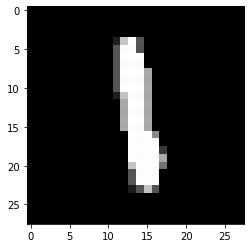

Digit in image is  1


In [5]:
plt.imshow(x_train[200], cmap='gray')
plt.show()
print("Digit in image is ",y_train[200])

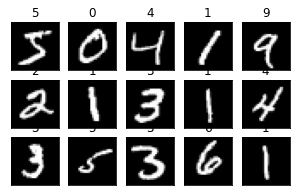

In [6]:
fig = plt.figure(figsize=(5,3))
for i in range(15):
    ax = fig.add_subplot(3,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]),cmap = 'gray')
    ax.set_title(y_train[i])

<AxesSubplot:ylabel='count'>

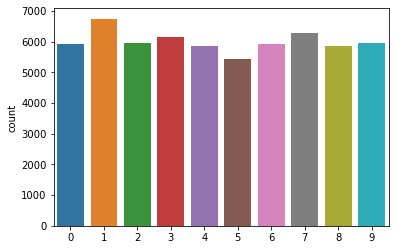

In [7]:
sns.countplot(y_train)

In [8]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

In [9]:
x_train.shape,x_train[1].shape

((60000, 28, 28, 1), (28, 28, 1))

In [35]:
datagen = ImageDataGenerator(rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        validation_split=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [36]:
training_set = datagen.flow(x_train, y_train, batch_size=32,subset='training',shuffle=True)

In [12]:
validation_set = datagen.flow(x_train, y_train, batch_size=32,subset='validation')

In [31]:
testdatagen = ImageDataGenerator(rescale=1./255)

In [32]:
test_set = testdatagen.flow(x_test, y_test, batch_size=32)

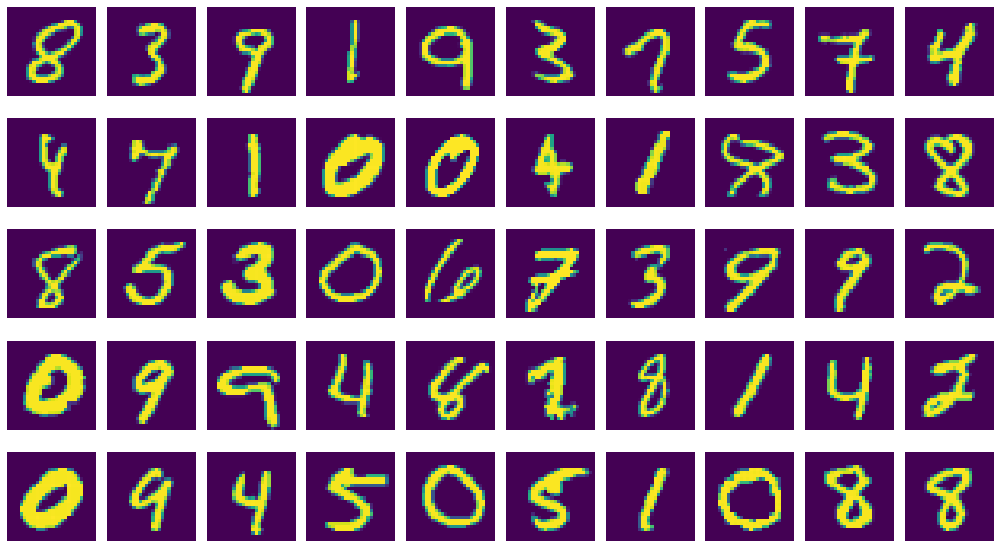

In [15]:
plt.figure(figsize = (14, 8))

for i in range(50):
    
    plt.subplot(5, 10, i + 1)
    
    for X, y in test_set:

        plt.imshow(X[0])
        plt.axis("off")
        break
        
plt.tight_layout()
plt.show()

0.0 0.12039032 0.99773574


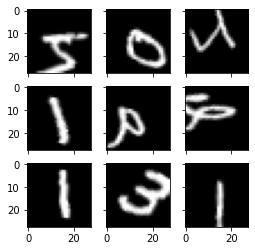

In [20]:
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9, shuffle=False):
    print(X_batch.min(), X_batch.mean(), X_batch.max())
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j], cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break

-12.411178 0.003361981 17.104136


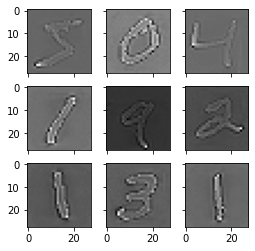

In [21]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, zca_whitening=True)
# fit parameters from data
X_mean = X_train.mean(axis=0)
datagen.fit(X_train - X_mean)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train - X_mean, y_train, batch_size=9, shuffle=False):
    print(X_batch.min(), X_batch.mean(), X_batch.max())
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j].reshape(28,28), cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break

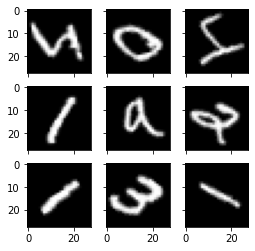

In [22]:
# define data preparation
datagen = ImageDataGenerator(rotation_range=90)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, shuffle=False):
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j].reshape(28,28), cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break

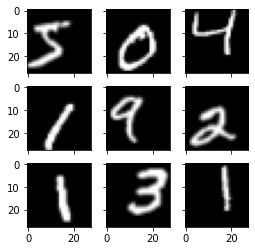

In [23]:
# define data preparation
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, shuffle=False):
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j].reshape(28,28), cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break

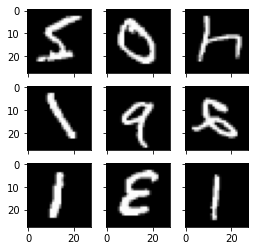

In [24]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, shuffle=False):
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j].reshape(28,28), cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break

In [37]:
def show_gen_img(data_generator):
    generator = data_generator.flow(x, batch_size=1)
    plt.figure(figsize=(17,8))
    for i in range(4):
        batches = next(generator)
        gen_img = array_to_img(batches[0])
        plt.subplot(1, 4, i+1)
        plt.imshow(gen_img)
    plt.show()

In [ ]:
# ImageDataGenerator flipping
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# iterator
aug_iter = datagen.flow(img, batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

	# convert to unsigned integers
	image = next(aug_iter)[0].astype('uint8')
 
	# plot image
	ax[i].imshow(image)
	ax[i].axis('off')